## Breast Cancer Detection

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

**Preprocessing**

load dataset

In [3]:
Dat = datasets.load_breast_cancer()

read dataset

In [4]:
print(Dat.DESCR)
print(Dat.keys())
print(Dat.target_names)
print(Dat.feature_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = Dat.data
y = Dat.target
print(X.shape, y.shape)

(569, 30) (569,)


In [6]:
data = pd.DataFrame(X, columns = Dat.feature_names)
data['class'] = y
print(data['class'].value_counts())
data.head()

1    357
0    212
Name: class, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

**Model Training**

Logistic Regression Classifier

In [9]:
from sklearn.linear_model import LogisticRegression
LRclf = LogisticRegression()
LRclf.fit(X_train, y_train)

c:\users\ashok\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

KNearestNeighbours Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNNclf = KNeighborsClassifier()
KNNclf.fit(X_train, y_train)

KNeighborsClassifier()

**Model Evaluation**

LR Classifier Scores

In [19]:
print("Accuracy on training set", LRclf.score(X_train, y_train))
print("Accuracy on test set", LRclf.score(X_test, y_test))

Accuracy on training set 0.94140625
Accuracy on test set 0.9649122807017544


LR Classifier Prediction

In [19]:
inp =np.array([13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259])
pred = LRclf.predict(inp.reshape(1,-1))
if (pred[0]==0):
    print('The breast Cancer is Malignant')
else:
    print('The breast cancer is Benign')
    
y_pred = LRclf.predict(X_test)

The breast cancer is Benign


LR classification record

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.89      0.92      0.90        36

    accuracy                           0.88        57
   macro avg       0.87      0.86      0.87        57
weighted avg       0.88      0.88      0.88        57



LR confusion matrics

<AxesSubplot:>

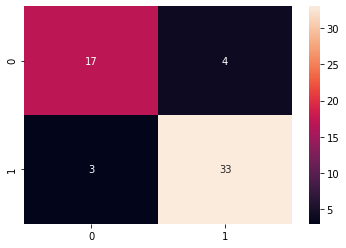

In [22]:
cm = confusion_matrix(y_true= y_test, y_pred= y_pred)
sn.heatmap(cm, annot=True)

KNN Classifier Scores

In [24]:
print("Accuracy on training set", KNNclf.score(X_train, y_train))
print("Accuracy on test set", KNNclf.score(X_test, y_test))

Accuracy on training set 0.951171875
Accuracy on test set 0.9298245614035088


KNN Classifier Prediction

In [25]:
pred = KNNclf.predict(inp.reshape(1,-1))
if (pred[0]==0):
    print('The breast Cancer is Malignant')
else:
    print('The breast cancer is Benign')

y_pred = KNNclf.predict(X_test)

The breast cancer is Benign


KNN classification record

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.97      0.95        36

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



KNN confusion matrics

<AxesSubplot:>

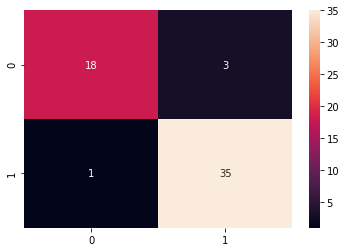

In [32]:
cm = confusion_matrix(y_true= y_test, y_pred= y_pred)
sn.heatmap(cm, annot=True)